In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
categories = pd.read_csv('product_categories.csv')

In [17]:
categories.columns = ['product_category', 'revenue', 'quantity']
categories.drop([4])
categories.head()

,product_category,revenue,quantity
0,Tanks,"$35,483.20","1,799"
1,Banners & Garlands,"$26,194.65","1,335"
2,Party Cups & Tumblers,"$23,243.85","1,998"
3,Sunglasses,"$15,906.30","2,465"
4,Games,"$13,346.25","12,521"


In [120]:
transactions = pd.read_csv('transaction_source_channel_region_revenue.csv')
transactions['Transaction_revenue'] = transactions['Transaction_revenue'].replace('[\$,]', '', regex=True).astype(float)
transactions['Transaction ID'] = transactions['Transaction ID'].replace('[\#,]', '', regex=True).astype('float')
transactions['Transaction ID'] = transactions['Transaction ID'].replace('[\#,]', '', regex=True).astype('int64')
import re
over_75 = transactions[transactions['Transaction_revenue']>75]
over_200 = transactions[transactions['Transaction_revenue']>200]



In [127]:
transactions.head()

,Transaction ID,Source,Channel,Region,Transaction_revenue
0,118331000000,google,Organic Search,Tennessee,3193.11
1,3698,l.instagram.com,Social,North Carolina,1662.83
2,7538,(direct),Direct,District of Columbia,1625.78
3,7247,google,Organic Search,North Carolina,1195.29
4,7219,google,Organic Search,California,1179.48


In [41]:
over_75.head()

,Transaction ID,Source,Channel,Region,Transaction_revenue
0,118331000000,google,Organic Search,Tennessee,3193.11
1,3698,l.instagram.com,Social,North Carolina,1662.83
2,7538,(direct),Direct,District of Columbia,1625.78
3,7247,google,Organic Search,North Carolina,1195.29
4,7219,google,Organic Search,California,1179.48


In [69]:
list(pd.DataFrame(transactions.Channel.value_counts(normalize = True)).Channel)

[0.5815789473684211,
 0.18421052631578946,
 0.11403508771929824,
 0.04473684210526316,
 0.039473684210526314,
 0.035964912280701755]

In [103]:
list(pd.DataFrame(transactions.groupby(transactions['Channel'])['Transaction_revenue'].sum().sort_values(ascending = True)).Transaction_revenue)# pd.DataFrame(item_details.groupby(item_details['Product'])['Product Revenue'].sum().sort_values(ascendin



[4451.100000000002,
 6792.54,
 9371.589999999997,
 18575.70000000003,
 35280.85999999989,
 121813.88000000051]

In [107]:
# pd.DataFrame(over_75.Channel.value_counts(normalize = True))

# list(pd.DataFrame(over_75.groupby(over_75['Channel'])['Transaction_revenue'].sum()).index)
list(pd.DataFrame(over_75.groupby(over_75['Channel'])['Transaction_revenue'].sum().sort_values(ascending = False)).Transaction_revenue)


[110747.00999999991,
 30497.77,
 15866.160000000009,
 8562.42,
 5907.900000000001,
 3501.13]

In [111]:
pd.DataFrame(over_75.groupby(over_200['Channel'])['Transaction_revenue'].sum().sort_values(ascending = False))

,Transaction_revenue
Channel,
Organic Search,80423.99
Direct,23305.07
Social,10332.95
Email,6384.51
Referral,3968.54
Paid Search,1500.78


In [62]:
pd.DataFrame(transactions[transactions['Transaction_revenue']<50].Channel.value_counts(normalize = True))

,Channel
Organic Search,0.523148
Direct,0.208333
Social,0.125000
Paid Search,0.050926
Referral,0.046296
Email,0.046296


In [71]:
list(pd.DataFrame(transactions[transactions['Transaction_revenue']<75].Channel.value_counts(normalize = True)).Channel)

[0.5125284738041003,
 0.2255125284738041,
 0.13439635535307518,
 0.04783599088838269,
 0.04100227790432802,
 0.0387243735763098]

(array([ 32., 184., 223., 113.,  79.,  99.,  43.,  54.,  43.,  20.,  22.,
         36.,  27.,  30.,  21.,   7.,  16.,  10.,   7.,  12.,   7.,   8.,
          2.,  10.,   0.,   4.,   3.,   5.,   3.,   3.,   1.,   2.,   1.,
          0.,   2.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([   0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
         275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
         550,  575,  600,  625,  650,  675,  700,  725,  750,  775,  800,
         825,  850,  875,  900,  925,  950,  975, 1000, 1025, 1050, 1075,
        1100, 1125, 1150, 1175, 1200, 1225, 1250, 1275, 1300, 1325, 1350,
        1375, 1400, 1425, 1450, 1475, 1500, 1525, 1550, 1575, 1600, 1625,
        1650, 16

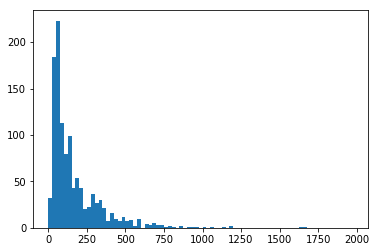

In [74]:
plt.hist(transactions['Transaction_revenue'], bins = list(range(0,2000, 25)))

In [122]:
item_details = pd.read_csv('transaction_performance.csv')
item_details['Product'] = item_details['Product'].str.replace(r'(\/ \w*)$','')
transaction_items = pd.DataFrame(item_details.groupby('Transaction ID')['Product'].apply(list))
transaction_items = pd.DataFrame(transaction_items.Product.values.tolist(), transaction_items.index).add_prefix('product_')
transaction_items = transaction_items.reset_index()
transaction_items['Transaction ID'] = transaction_items['Transaction ID'].replace('[\#,]', '', regex=True).astype('float')
transaction_items['Transaction ID'] = transaction_items['Transaction ID'].replace('[\#,]', '', regex=True).astype('int64')


In [128]:
transaction_items.head()

,Transaction ID,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,...,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20,product_21,product_22
0,1035,"Grey, Pink & Mint Drunk in Love Tanks - Drunk ...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1038,Gold Bachelorette Tattoos Mix Pack,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1039,"Grey, Pink & Mint Bride Tribe Tanks - Bride (G...","Grey, Pink & Mint Bride Tribe Tanks - Bride (G...","Grey, Pink & Mint Bride Tribe Tanks - Bride Tr...",Flamingo Sunnies,Pineapple Sunnies,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1040,Black & White Drunk in Love Tanks - Just Drunk...,Black & White Drunk in Love Tanks - Drunk in L...,Black & White Drunk in Love Tanks - Just Drunk...,Black & White Drunk in Love Tanks - Just Drunk...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1061,Flamingo Drink Floaties Set,Bride To Be Headband - Light Pink,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [130]:
transactions_all = transactions.join(transaction_items.set_index(['Transaction ID']), on = ['Transaction ID'], how = 'left')


In [131]:
transactions_all.head()

,Transaction ID,Source,Channel,Region,Transaction_revenue,product_0,product_1,product_2,product_3,product_4,...,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20,product_21,product_22
0,118331000000,google,Organic Search,Tennessee,3193.11,Black & White Drunk in Love Tanks - Just Drunk...,Rainbow Sherbet Tissue Paper Tassel Garland,Acrylic Confetti Wine Tumbler - Pink & Mint Ombre,Acrylic Confetti Wine Tumbler - Pink Ombre,Pink Party Tissue Paper Tassel Garland,...,Black & White Drunk in Love Tanks - Drunk in L...,"Grey, Pink & Mint Drunk in Love Tanks - Drunk ...",Bride To Be Headband - Hot Pink,Bride To Be Headband - Light Pink,Inflatable Bride Crown,"36"" Mylar Engagement Ring Balloon",Pink Party Balloons,Mylar Love Calligraphy Balloon,Black & Gold Brushed Heart Balloon Set,None
1,3698,l.instagram.com,Social,North Carolina,1662.83,Black & White Bride Tribe Tanks - Bride Tribe ...,Black & White Bride Tribe Tanks - Bride Tribe ...,Black & White Bride Tribe Tanks - Bride Tribe ...,Bride Tribe Pins Party Pack (Set of 12),Bride Tribe Gold Tattoo Party Pack - Party Pac...,...,Future Mrs. | Cheers Bitches Koozies - Future ...,I Do Crew Flower Crowns - White,None,None,None,None,None,None,None,None
2,7538,(direct),Direct,District of Columbia,1625.78,Wishes for the Couple Cards,Ring Bling Napkins,Rose Gold Ring Bling Napkins,None,None,...,None,None,None,None,None,None,None,None,None,None
3,7247,google,Organic Search,North Carolina,1195.29,Champagne Campaign Tanks - Champagne Campaign ...,Champagne Campaign Tanks - Champagne Campaign ...,Drunk in Love Koozies - Neon Pink (Just Drunk),Pink Champagne Tissue Paper Tassel Garland,Bride To Be Booty Veil,...,Drunk in Love Koozies - White (Drunk in Love),Gold Polka Dot Party Straws,None,None,None,None,None,None,None,None
4,7219,google,Organic Search,California,1179.48,Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,Cactus Party Tissue Paper Tassel Garland,Final Fiesta Tanks - No Time To Siesta (Bride),Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,...,None,None,None,None,None,None,None,None,None,None


In [132]:
transactions_all[transactions_all.Transaction_revenue>75]

,Transaction ID,Source,Channel,Region,Transaction_revenue,product_0,product_1,product_2,product_3,product_4,...,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20,product_21,product_22
0,118331000000,google,Organic Search,Tennessee,3193.11,Black & White Drunk in Love Tanks - Just Drunk...,Rainbow Sherbet Tissue Paper Tassel Garland,Acrylic Confetti Wine Tumbler - Pink & Mint Ombre,Acrylic Confetti Wine Tumbler - Pink Ombre,Pink Party Tissue Paper Tassel Garland,...,Black & White Drunk in Love Tanks - Drunk in L...,"Grey, Pink & Mint Drunk in Love Tanks - Drunk ...",Bride To Be Headband - Hot Pink,Bride To Be Headband - Light Pink,Inflatable Bride Crown,"36"" Mylar Engagement Ring Balloon",Pink Party Balloons,Mylar Love Calligraphy Balloon,Black & Gold Brushed Heart Balloon Set,None
1,3698,l.instagram.com,Social,North Carolina,1662.83,Black & White Bride Tribe Tanks - Bride Tribe ...,Black & White Bride Tribe Tanks - Bride Tribe ...,Black & White Bride Tribe Tanks - Bride Tribe ...,Bride Tribe Pins Party Pack (Set of 12),Bride Tribe Gold Tattoo Party Pack - Party Pac...,...,Future Mrs. | Cheers Bitches Koozies - Future ...,I Do Crew Flower Crowns - White,None,None,None,None,None,None,None,None
2,7538,(direct),Direct,District of Columbia,1625.78,Wishes for the Couple Cards,Ring Bling Napkins,Rose Gold Ring Bling Napkins,None,None,...,None,None,None,None,None,None,None,None,None,None
3,7247,google,Organic Search,North Carolina,1195.29,Champagne Campaign Tanks - Champagne Campaign ...,Champagne Campaign Tanks - Champagne Campaign ...,Drunk in Love Koozies - Neon Pink (Just Drunk),Pink Champagne Tissue Paper Tassel Garland,Bride To Be Booty Veil,...,Drunk in Love Koozies - White (Drunk in Love),Gold Polka Dot Party Straws,None,None,None,None,None,None,None,None
4,7219,google,Organic Search,California,1179.48,Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,Cactus Party Tissue Paper Tassel Garland,Final Fiesta Tanks - No Time To Siesta (Bride),Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,...,None,None,None,None,None,None,None,None,None,None
5,8832,google,Organic Search,Wyoming,1126.35,Final Fiesta Tassel Garland,Mini Cactus Party Garland,Gold Bachelorette Tattoos Mix Pack,Final Fiesta Sombrero & Future Mrs. Veil,Bride To Be Booty Veil,...,None,None,None,None,None,None,None,None,None,None
6,8426,google,Organic Search,Florida,1061.54,Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,Drunk in Love Tanks - Just Drunk (Mint),Bride To Be Headband Veil,Drunk in Love Tanks - Just Drunk (Mint),I Do Crew Flower Crowns - Peach,...,None,None,None,None,None,None,None,None,None,None
7,6873,google,Organic Search,New York,1022.75,Pink Ombre Confetti Tumbler,Champagne Campaign Tanks - Champagne Campaign ...,Champagne Campaign Tanks - Champagne Campaign ...,Pink Party Tissue Paper Tassel Garland,"Champagne Campaign Tanks - Pop The Champagne, ...",...,Engagement Ring Drink Floaties Set,Flamingo Drink Floaties Set,None,None,None,None,None,None,None,None
8,6602,(direct),Direct,District of Columbia,956.34,Champagne Campaign Tanks - Champagne Campaign ...,I Do Crew Flower Crowns - Pink,Champagne Campaign Tanks - Champagne Campaign ...,"Champagne Campaign Tanks - Pop The Champagne, ...",Champagne Campaign Tanks - Champagne Campaign ...,...,None,None,None,None,None,None,None,None,None,None
9,6578,google,Organic Search,Prince Edward Island,929.77,Bride Tribe Tanks - Bride Tribe (Black Tank),Bride Tribe Tanks - Bride Tribe (Black Tank),Bride Tribe Tanks - Bride Tribe (Black Tank),Gold Bachelorette Tattoos Mix Pack,Bride Tribe Pins Party Pack - 10 Pack,...,None,None,None,None,None,None,None,None,None,None
